# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [46]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [47]:
# Your work here.
#import modules
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#look at df
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the data normally distributed?

Temperature: Mean 98.25 Standard Deviation: 0.73
Heart Rate: Mean 73.76 Standard Deviation: 7.03


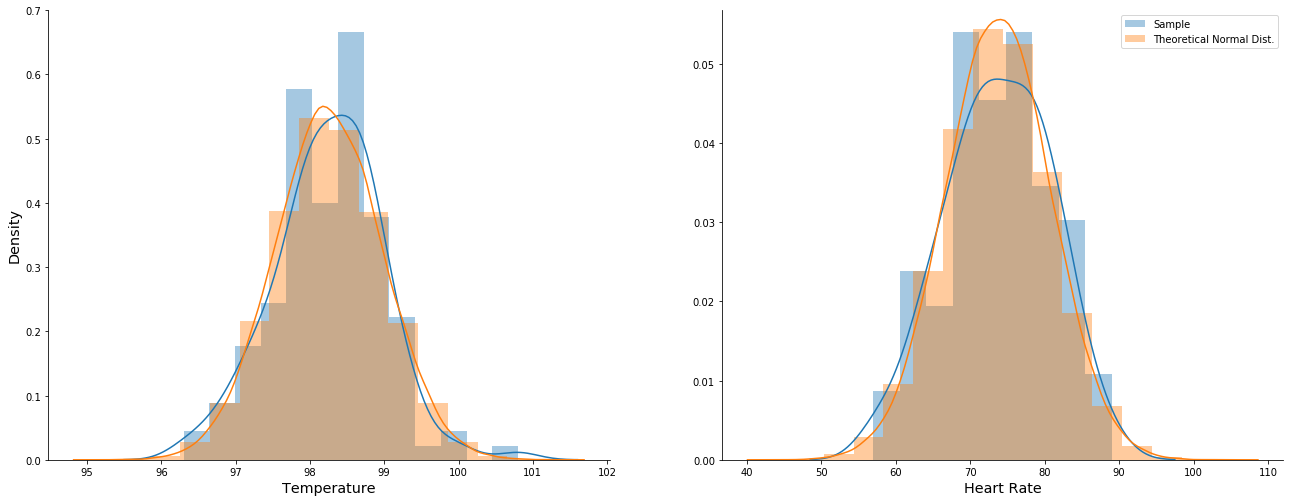

In [52]:
#Create a histogram of the data for visual inspection

#Set varibles from dataframe
T = df['temperature']
G = df['gender']
H = df['heart_rate']

#Establish Paper Sizes
A5 = (5.85,4.135)
A4 = (11.7,8.27)
A3 = (22.14,16.54)

#Create Subplots
f, ax = plt.subplots(1, 2)
f.set_size_inches(A3[0],A4[1])
ax[0].set_xlabel('Temperature', fontsize='x-large')
ax[0].set_ylabel('Density', fontsize='x-large')
ax[1].set_xlabel('Heart Rate', fontsize='x-large')

#Plot Histograms
f = sns.distplot(T, ax=ax[0], axlabel='Temperature', label='Sample')
f = sns.distplot(H, ax=ax[1], axlabel='Heart Rate', label='Sample')

#Find distrobution parameters
muT = round(np.mean(T), 2)
sigT = round(np.std(T), 2)
vT = round(np.var(T), 2)

muH = round(np.mean(H), 2)
sigH = round(np.std(H), 2)
vH = round(np.var(H), 2)

print('Temperature: Mean',muT,'Standard Deviation:', sigT,)
print('Heart Rate: Mean',muH, 'Standard Deviation:', sigH)

#Create theoretical normal distrobutions
theo_T = np.random.normal(muT, sigT, 100000)
theo_H = np.random.normal(muH, sigH, 100000)

#Overlay theoretical normal distrobutions
f = sns.distplot(theo_T, ax=ax[0], hist=True, bins=16, label='Theoretical Normal Dist.')
f = sns.distplot(theo_H, ax=ax[1], hist=True, bins=16, label='Theoretical Normal Dist.')

sns.despine(ax=ax[0])
sns.despine(ax=ax[1])

plt.legend()
plt.show()

A visual inspection through histograms shows that the dataset appears to roughly fit a normal distribution. however, there appears to be a double peak in in each of the variables. Perhaps this corresponds to differing means between male and female populations.